In [16]:
%matplotlib inline
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import pywt

# from scipy.optimize import fsolve
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.15)

In [17]:
base_path = os.path.dirname(os.getcwd())
signal = np.load(os.path.join(base_path, 'single_elm_event.npy'))
signal.shape

(5797, 64)

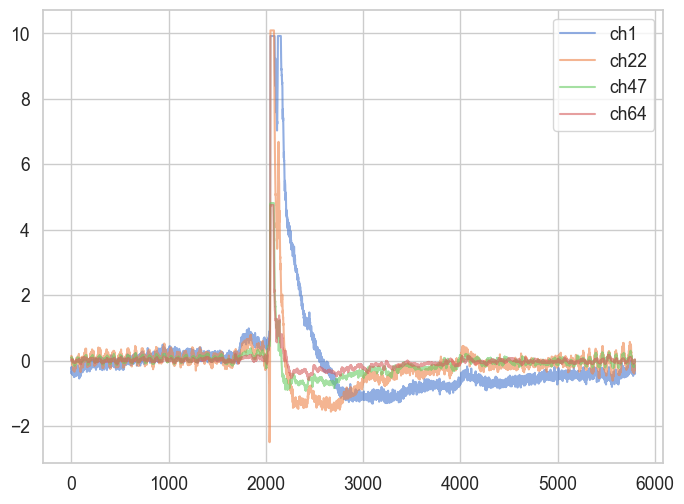

In [18]:
signal_ch1 = signal[:, 0]
signal_ch22 = signal[:, 21]
signal_ch47 = signal[:, 46]
signal_ch64 = signal[:, -1]

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(signal_ch1, alpha=0.6, label='ch1')
ax.plot(signal_ch22, alpha=0.6, label='ch22')
ax.plot(signal_ch47, alpha=0.6, label='ch47')
ax.plot(signal_ch64, alpha=0.6, label='ch64')
ax.legend()
plt.show()

[0.40625    0.203125   0.13541667 0.1015625  0.08125    0.06770833
 0.05803571 0.05078125 0.04513889 0.040625   0.03693182 0.03385417
 0.03125    0.02901786 0.02708333 0.02539062 0.02389706 0.02256944
 0.02138158 0.0203125  0.01934524 0.01846591 0.01766304 0.01692708
 0.01625    0.015625   0.0150463  0.01450893 0.01400862 0.01354167
 0.01310484 0.01269531 0.01231061 0.01194853 0.01160714 0.01128472
 0.01097973 0.01069079 0.01041667 0.01015625 0.00990854 0.00967262
 0.00944767 0.00923295 0.00902778 0.00883152 0.00864362 0.00846354
 0.00829082 0.008125   0.00796569 0.0078125  0.00766509 0.00752315
 0.00738636 0.00725446 0.00712719 0.00700431 0.00688559 0.00677083
 0.00665984 0.00655242 0.00644841 0.00634766]


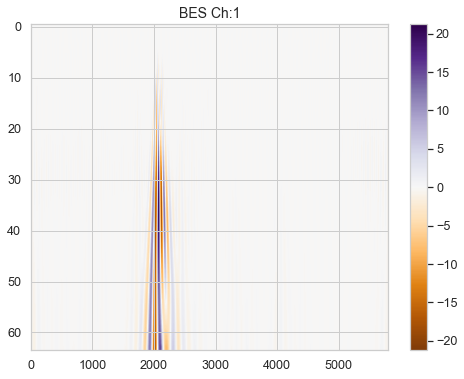

In [19]:
# apply wavelet transforms using pywt
widths = np.arange(0, 129, 2)[1:]
coeffs, freqs = pywt.cwt(signal_ch1, widths, 'morl', axis=0)
# coeffs_squared = np.log(coeffs**2)
print(freqs)
plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
)
plt.colorbar()
plt.title('BES Ch:1', fontsize=14);

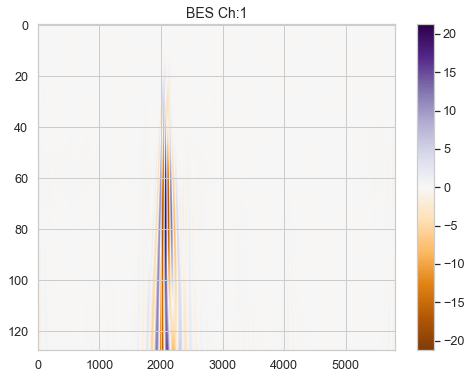

In [20]:
widths = np.arange(0, 129)[1:]
coeffs, freqs = pywt.cwt(signal_ch1, widths, 'morl', axis=0)
# coeffs_squared = np.log(coeffs**2)
plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
)
plt.colorbar()
plt.title('BES Ch:1', fontsize=14);

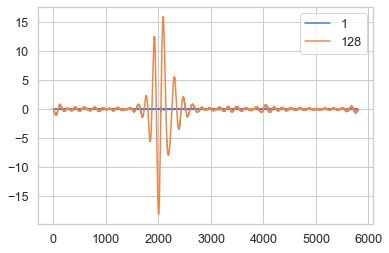

In [21]:
plt.plot(coeffs[0, :], label='1')
plt.plot(coeffs[-1, :], label='128')
plt.legend()
plt.show()

In [22]:
coeff_list = pywt.swt(signal_ch1[:-1], 'db2', level=2)
(cA2, cD2), (cA1, cD1) = coeff_list
len(cA2), len(cD2), len(cA1), len(cD1)

(5796, 5796, 5796, 5796)

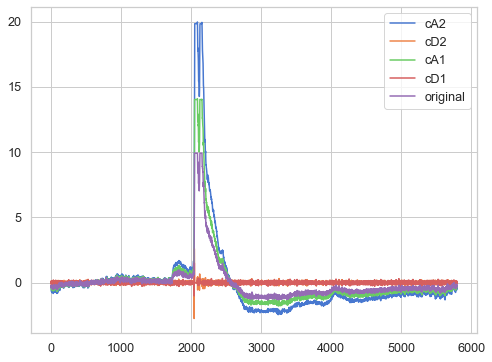

In [24]:
coeffs_list = pywt.swt(signal_ch1[:-1], 'db2', level=2)
(cA2, cD2), (cA1, cD1) = coeffs_list
plt.figure(figsize=(8, 6))
plt.plot(cA2, label='cA2')
plt.plot(cD2, label='cD2')
plt.plot(cA1, label='cA1')
plt.plot(cD1, label='cD1')
plt.plot(signal_ch1[:-1], label='original')
plt.legend()
plt.show()

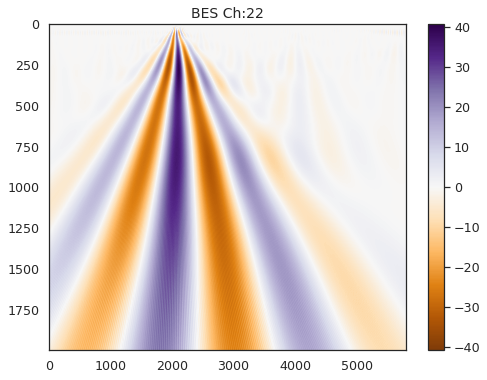

In [9]:
widths = np.arange(1, 2000)
coeffs, freqs = pywt.cwt(signal_ch22, widths, 'morl')

plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
    label='Ch22'
)
plt.colorbar()
plt.title('BES Ch:22', fontsize=14);

(256, 5797)


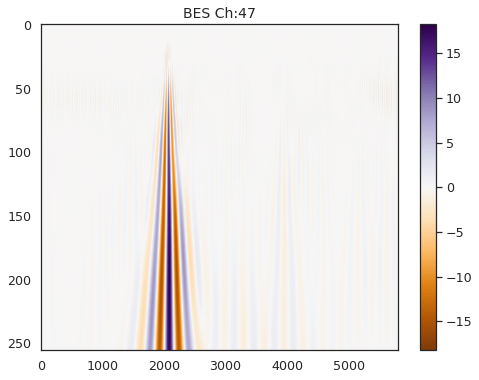

In [10]:
# apply wavelet transforms using pywt
widths = np.arange(1, 257)
coeffs, freqs = pywt.cwt(signal_ch47, widths, 'morl')
print(coeffs.shape)
plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
)
plt.colorbar()
plt.title('BES Ch:47', fontsize=14);

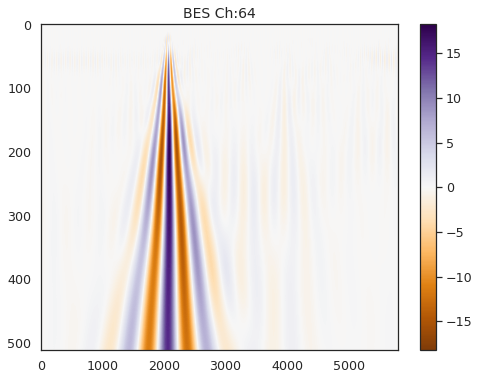

In [11]:
# apply wavelet transforms using pywt
widths = np.arange(1, 513)
coeffs, freqs = pywt.cwt(signal_ch47, widths, 'morl')

plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
)
plt.colorbar()
plt.title('BES Ch:64', fontsize=14);

In [13]:
# apply wavelet transforms using pywt
widths = np.arange(1, 1025)
coeffs, freqs = pywt.cwt(signal, widths, 'morl', axis=0)

coeffs.shape

(1024, 5797, 64)

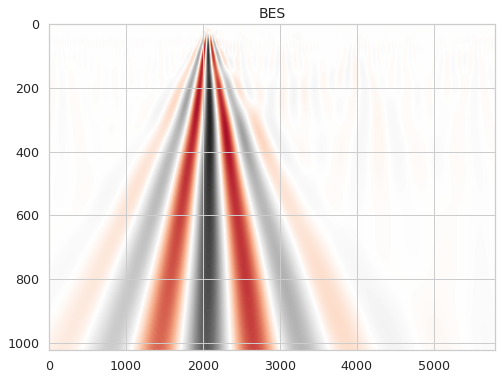

In [14]:
plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs[:, :, -1],
    cmap="RdGy",
    aspect="auto",
    vmax=abs(coeffs[:, :, -1]).max(),
    vmin=-abs(coeffs[:, :, -1]).max(),
)
plt.title('BES', fontsize=14);

In [ ]:
# # Following class implements Morlet wavelet
# class Morlet(object):
#     def __init__(self, w0=6):
#         self.w0 = w0
#         if w0 == 6:
#             self.C_d = 0.776
    
#     def __call__(self, *args, **kwargs):
#         return self.time(*args, **kwargs)

#     def time(self, t, s=1.0, complete=True):
#         w = self.w0

#         x = t / s

#         output = np.exp(1j * w * x)

#         if complete:
#             output -= np.exp(-0.5 * (w**2))
        
#         output *= np.exp(-0.5 * (x**2)) * np.pi**(-0.25)

#         return output


# class CWT(nn.Module):
#     def __init__(
#         self, 
#         dj=0.0625, 
#         dt=1/2048, 
#         wavelet=Morlet(), 
#         fmin=20, 
#         fmax=500, 
#         output_format='Magnitude', 
#         trainable=False, 
#         hop_length=1
#     ):
#         super().__init__()
#         self.wavelet = wavelet
#         self.dt = dt
#         self.dj = dj
#         self.fmin = fmin
#         self.fmax = fmax
#         self.output_format = output_format
#         self.trainable = trainable
#         self.stride = (1, hop_length)
#         self._scale_minimum = self.compute_minimum_scale()

#         self.signal_length = None
#         self._channels = None
#         self._scales = None
#         self._kernel = None
#         self._kernel_real = None
#         self._kernel_imag = None

#     def compute_optimal_scales(self):
#         if self.signal_length is None:
#             raise ValueError('Please specify signal length before computing optimal scales')
        
#         J = int(
#             (1/self.dj) * np.log2(self.signal_length * self.dt / self._scale_minimum)
#         )
#         scales = self._scale_minimum * 2**(self.dj * np.arange(0, J+1))

#         # TODO: remove high and low frequencies

#         return scales
    
#     def compute_minimum_scale(self):
#         dt = self.dt

#         def __solver(s):
#             return self.wavelet.fourier_periods(s) - 2 * dt
        
#         return fsolve(__solver, 1)[0]
